 # Craigslist Capstone Project - Modeling

#### The goal of this capstone is to predict market rent prices in the San Francisco Bay Area. The metros of interest are San Francisco, Peninsula, East Bay.

Prior to this notebook, the preprocessing was performed and numeric data was scaled. Training and test data have been split.

#### This notebook covers the scope of
1. Building a Linear Regression Model
2. Building a Random Forest Model
3. Build a Gradient Boosted Regressor

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.linear_model import ElasticNet, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, confusion_matrix, r2_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_score

## Load Data

In [2]:
X_train = pd.read_csv('/Users/pandabear/springboard/CapstoneTwoProject/data/interim/X_train.csv',index_col='listing_id')
y_train = pd.read_csv('/Users/pandabear/springboard/CapstoneTwoProject/data/interim/y_train.csv')['listing_price']
X_test = pd.read_csv('/Users/pandabear/springboard/CapstoneTwoProject/data/interim/X_test.csv',index_col='listing_id')
y_test = pd.read_csv('/Users/pandabear/springboard/CapstoneTwoProject/data/interim/y_test.csv')['listing_price']


In [3]:
X_train

,listing_sqft,animals_cats,animals_dogs,smoking,wheelchair accessible,has_AC,hasEVCharging,laundry_in_bldg,laundry_in_unit,laundry_has_hookup,...,has_amenities,premium_finishes,ensuite_bath,has_balcony,has_backyard,has_view,multi-level,no_bedrooms,no_bathrooms,price_per_sqft
listing_id,,,,,,,,,,,,,,,,,,,,,
7537017722,0.283347,1,1,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0.833333,0.428571,0.722711
7537039769,0.309467,1,1,1,1,0,0,0,1,0,...,1,0,0,0,0,1,0,0.500000,0.428571,0.889321
7536772180,0.143198,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0.166667,0.142857,0.815318
7535447025,0.192257,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.333333,0.142857,0.319801
7534822392,0.182710,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0.166667,0.142857,0.349301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7518503195,0.116680,1,1,1,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0.333333,0.142857,0.763497
7536321225,0.275789,0,0,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0.333333,0.142857,0.441720
7510619202,0.315566,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0.500000,0.428571,0.533202


In [4]:
# # Try a model where there is no no_bedrooms column
# X_train.drop('no_bedrooms', axis=1, inplace=True)
# X_test.drop('no_bedrooms', axis=1, inplace=True)
# X_train

## 1. Linear Regression

In [5]:
regr = LinearRegression()
regr.fit(X_train, y_train)
print(f'Coefficient of determination of training set: {regr.score(X_train, y_train):.2f}')
print(f'Coefficient of determination of test set: {regr.score(X_test, y_test):.2f}')

Coefficient of determination of training set: 0.69
Coefficient of determination of test set: 0.69


In [6]:
param_grid = { 
    'alpha': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6],
}

cv = GridSearchCV(estimator=ElasticNet(max_iter=100000, warm_start=True, tol=1e-4), param_grid=param_grid, cv=5, refit=True)
cv.fit(X_train, y_train)

# Apply RF to the training data:
regr = cv.best_estimator_

print(f'Cross Validation best parameters: {cv.best_params_}')
print(f'Coefficient of determination of training set: {regr.score(X_train, y_train):.2f}')
print(f'Coefficient of determination of test set: {regr.score(X_test, y_test):.2f}')

/Users/pandabear/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.495e+06, tolerance: 1.333e+06
  model = cd_fast.enet_coordinate_descent(
/Users/pandabear/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.089e+06, tolerance: 1.365e+06
  model = cd_fast.enet_coordinate_descent(
/Users/pandabear/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing 

Cross Validation best parameters: {'alpha': 1e-05}
Coefficient of determination of training set: 0.69
Coefficient of determination of test set: 0.69


/Users/pandabear/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.309e+06, tolerance: 1.694e+06
  model = cd_fast.enet_coordinate_descent(


In [7]:
# Predict price from X_test
y_pred_lr = regr.predict(X_test)

In [8]:
#scores = cross_val_score(regr, X_test, y_test, cv=5)
#print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

In [9]:
print(f'MAE test: {mean_absolute_error(y_test, y_pred_lr):.2f}')
print(f'RMSE test: {mean_squared_error(y_test, y_pred_lr, squared=False):.2f}')
print(f'R2 score: {r2_score(y_test, y_pred_lr):.2f}')

MAE test: 551.50
RMSE test: 819.65
R2 score: 0.69


## Plot the residuals between predicted price and actual price

Text(0.5, 1.0, 'Residual Density for Linear Regression in dollar amount')

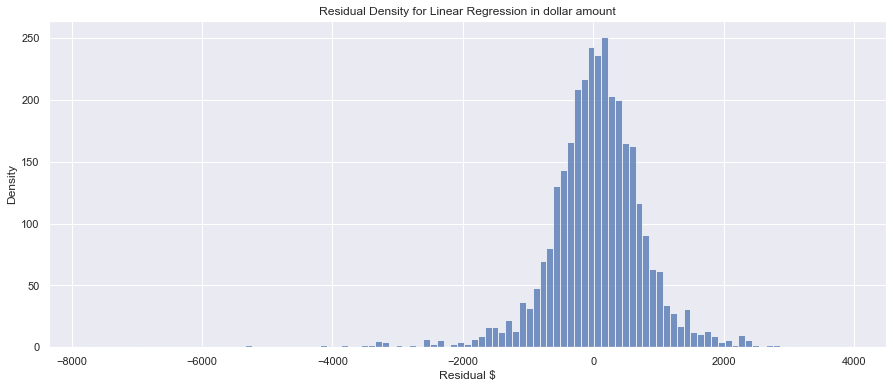

In [10]:
residuals_as_prices = y_pred_lr - y_test
# Plot test set with missing sqft that was imputed
sns.set(rc={"figure.figsize":(15, 6)})
s = sns.histplot(residuals_as_prices)
plt.ylabel('Density')
plt.xlabel('Residual $')
plt.title('Residual Density for Linear Regression in dollar amount')

There seems to be a long left tail where the model is predicting higher prices for a listing than the actual price.
Let's look into the proportions of residual distribution. Define a low residual as one where the model has closely predicted the listing price. A medium residual to be an ok prediction but off by a few hundred, and a high residual as a predicted value that wouldn't help inform the user. 

In [22]:
# Take a closer look at why the data with high residuals
X_test_size = X_test.shape[0]

low_residual = 100
med_residual = 500
high_residual = 1000

# Also useful to compare percentages of the listing price
low_residual_percent = 0.15
residual = pd.DataFrame(y_pred_lr - y_test)

residual.rename(columns = {'listing_price':'price_residual'}, inplace = True)


In [23]:
residual['listing_price'] = y_test
residual['residual_percent'] = residual['price_residual']/residual['listing_price']
residual['residual_category'] = np.where(np.abs(residual['residual_percent'])<low_residual_percent, 'Within_15_percent', 'More_than_15_percent')
residual

,price_residual,listing_price,residual_percent,residual_category
0,-88.462506,2600,-0.034024,Within_15_percent
1,-259.840446,3556,-0.073071,Within_15_percent
2,-128.693701,2050,-0.062777,Within_15_percent
3,1064.469171,2295,0.463821,More_than_15_percent
4,174.963508,2800,0.062487,Within_15_percent
...,...,...,...,...
3273,-473.366345,2795,-0.169362,More_than_15_percent
3274,124.721250,2525,0.049395,Within_15_percent
3275,-812.918384,4295,-0.189271,More_than_15_percent
3276,-92.990177,3395,-0.027390,Within_15_percent


Text(0.5, 1.0, 'Residual Density as a proportion of listing price for Linear Regression')

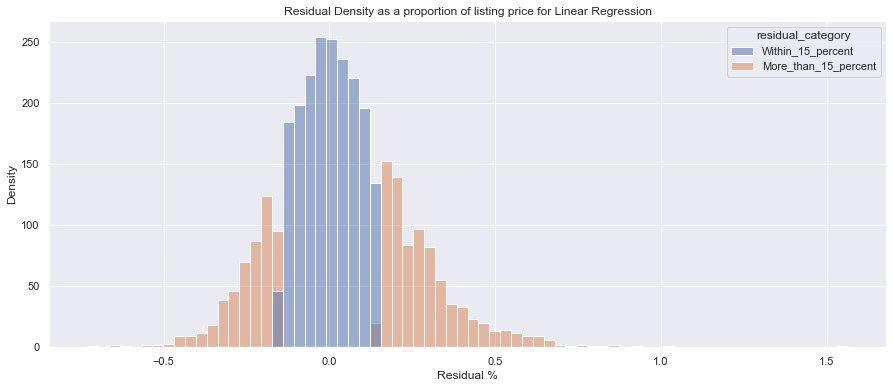

In [24]:
# Plot the distribution of residuals as a percentage
sns.set(rc={"figure.figsize":(15, 6)})
s = sns.histplot(data = residual, x='residual_percent', hue='residual_category')
plt.ylabel('Density')
plt.xlabel('Residual %')
plt.title('Residual Density as a proportion of listing price for Linear Regression')

In [25]:
# Look at the high_residual rows
index_of_interest_high = residual[(residual['price_residual'] > high_residual) | (residual['price_residual'] < -high_residual)].index
print(f'X_test with missing square footage values imputed:')
print(f'There are {len(index_of_interest_high)} rows that have residuals greater than {high_residual} between actual and predicted price, which is {(len(index_of_interest_high)/X_test_size)*100:.1f}%')

# Look at the med_residual rows
index_of_interest_med = residual[(residual['price_residual'] < med_residual) & (residual['price_residual'] > -med_residual)].index
print(f'There are {len(index_of_interest_med)} rows that have residuals less than {med_residual} between actual and predicted price, which is {(len(index_of_interest_med)/X_test_size)*100:.1f}%')

# Look at the low_residual rows
index_of_interest_low = residual[(residual['price_residual'] > -low_residual) & (residual['price_residual'] < low_residual)].index
print(f'There are {len(index_of_interest_low)} rows that have residuals less than {low_residual} between actual and predicted price, which is {(len(index_of_interest_low)/X_test_size)*100:.1f}%')

# Get index of rows of interest, where residual is greater than med_residual ######
index_of_interest = residual[(residual['price_residual'] < -med_residual) | (residual['price_residual'] > med_residual)].index




X_test with missing square footage values imputed:
There are 442 rows that have residuals greater than 1000 between actual and predicted price, which is 13.5%
There are 1962 rows that have residuals less than 500 between actual and predicted price, which is 59.9%
There are 455 rows that have residuals less than 100 between actual and predicted price, which is 13.9%


In [26]:
# Get listing_ids of rows of interest
listing_ids_residuals = X_test.iloc[index_of_interest,:].index

# Get list of predicted values
pred_values = []
for i in index_of_interest:
    pred_values.append(y_pred_lr[i])
    
# Create a dictionary of listing_ids as keys and predicted values as values
dict_cases = dict(zip(listing_ids_residuals,pred_values))

# Or a df of the listing_ids and predicted values
listing_pred = pd.DataFrame(data =pred_values,index = listing_ids_residuals, columns = ['y_pred'])
listing_pred

,y_pred
listing_id,
7518213315,3359.469171
7512822358,5467.190716
7513440305,1513.389297
7535514443,2895.758385
7501999676,3635.344067
...,...
7516571311,5038.710327
7539496281,3148.049551
7539920369,1572.805760


In [16]:
# Load entire df after preprosessing but before minmax scaling to look at individual listings that have high residuals
df_nonscaled = pd.read_csv('/Users/pandabear/springboard/CapstoneTwoProject/data/interim/combined_DF_MODEL.csv',index_col='listing_id')
df_nonscaled

,listing_sqft,animals_cats,animals_dogs,smoking,wheelchair accessible,has_AC,hasEVCharging,laundry_in_bldg,laundry_in_unit,laundry_has_hookup,...,premium_finishes,ensuite_bath,has_balcony,has_backyard,has_view,multi-level,no_bedrooms,no_bathrooms,average_price_by_nh_by_bedroom,listing_price
listing_id,,,,,,,,,,,,,,,,,,,,,
7495842903,400.0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,1.0,2699.140187,1695
7495939664,675.0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,1.0,2246.909091,3195
7495966009,927.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1.0,3012.829114,4999
7496082921,505.0,1,1,1,0,0,0,0,1,0,...,0,1,1,0,1,0,0,1.0,1820.625000,2125
7496092147,875.5,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,2,1.0,2504.009709,2350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7542387176,675.0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,1,0,1,1.0,2329.579832,1950
7542399903,875.5,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,2,1.0,2875.904762,2700
7542407920,600.0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1.0,2031.268657,1963


In [17]:
#dict(zip(df.apply(lambda row: '{}|{}'.format(row.listing_nh, row.no_bedrooms), axis=1), df['listing_price']))

In [18]:
#problematic_df = df.loc[listing_ids_residuals]

In [27]:
# Look at residuals as a percentage of listing price

# Add 2 columns: predicted price from the model, and residual
residuals_df = pd.merge(listing_pred, df_nonscaled, on = 'listing_id', how = 'left')

residuals_df['actual-pred'] = residuals_df['listing_price'] - residuals_df['y_pred']
residuals_df['residual_percentage'] = residuals_df['actual-pred']/residuals_df['listing_price']

# Only look at rows that have listing_sqft i.e. it was not imputed
residuals_df = residuals_df[residuals_df.listing_sqft.notnull()]

In [42]:
# Focus on residuals greater than 50%
residuals_50 = residuals_df[(residuals_df['residual_percentage'] > 0.5) | (residuals_df['residual_percentage'] < -0.5)]
print(f'There are {residuals_50.shape[0]} rows that had residuals greater than 50%')
residuals_50

There are 80 rows that had residuals greater than 50%


,y_pred,listing_sqft,animals_cats,animals_dogs,smoking,wheelchair accessible,has_AC,hasEVCharging,laundry_in_bldg,laundry_in_unit,...,has_balcony,has_backyard,has_view,multi-level,no_bedrooms,no_bathrooms,average_price_by_nh_by_bedroom,listing_price,actual-pred,residual_percentage
listing_id,,,,,,,,,,,,,,,,,,,,,
7501999676,3635.344067,675.0,0,0,1,0,0,0,1,0,...,0,0,1,0,1,1.0,3167.087719,2225,-1410.344067,-0.633863
7532121830,4814.366009,1150.0,1,1,1,0,0,0,0,1,...,0,0,1,0,3,1.0,5481.705882,3100,-1714.366009,-0.553021
7518922352,5434.553570,1442.0,1,1,1,1,1,1,0,1,...,0,0,0,0,3,2.0,5841.638889,11956,6521.446430,0.545454
7508359210,4878.250409,1150.0,1,1,0,0,0,0,0,1,...,1,0,1,0,1,2.0,3548.785714,3095,-1783.250409,-0.576171
7539981195,6968.286135,3196.0,1,1,0,0,1,0,0,1,...,0,0,0,0,5,3.0,3845.000000,3750,-3218.286135,-0.858210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7540850426,5711.597211,1597.0,0,0,0,0,0,0,0,1,...,0,0,0,0,2,2.5,4853.767773,11500,5788.402789,0.503339
7519773708,6453.453741,1900.0,1,1,0,1,0,0,0,1,...,0,1,1,0,3,3.0,3582.325581,3500,-2953.453741,-0.843844
7532272206,1337.491894,723.0,0,0,0,0,0,0,1,0,...,0,0,0,0,2,1.0,2884.364341,2680,1342.508106,0.500936


In [ ]:
# y_pred = regr.predict(X_test) 
# plt.scatter(y_pred, y_test, color ='b') 
# plt.title("Predicted vs. Actual y values")
# plt.xlabel("Predicted value")
# plt.ylabel("Actual value")
# plt.show()

In [ ]:
# plt.figure(figsize=(15,10))

# ## plotting residual errors in training data
# plt.scatter(regr.predict(X_train), regr.predict(X_train) - y_train,
#             color = "green", s = 10, label = 'Train data')
  
# ## plotting residual errors in test data
# plt.scatter(regr.predict(X_test), regr.predict(X_test) - y_test,
#             color = "blue", s = 10, label = 'Test data')
  
# ## plotting line for zero residual error
# plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 5, color = "black")
  
# ## plotting legend
# plt.legend(loc = 'upper right')
  
# ## plot title
# plt.title("Residual errors")

# plt.xlim(0, 15000)
# plt.ylim(-15000,15000)

# plt.xlabel("Predicted value")
# plt.ylabel("Residual")

# plt.show()

## 2. Random Forest Regressor

In [29]:
param_grid = { 
    'n_estimators': [100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6]
}

CV_rf = GridSearchCV(estimator = RandomForestRegressor(), param_grid = param_grid, cv = 5, refit = True)
CV_rf.fit(X_train, y_train)

# Apply RF to the training data:
rf = CV_rf.best_estimator_

print(f'Cross Validation best parameters: {CV_rf.best_params_}')

Cross Validation best parameters: {'max_depth': 6, 'max_features': 'auto', 'n_estimators': 100}


In [30]:
# Predict using the model:
y_pred = rf.predict(X_test)

# Accuracy score
print(f'Accuracy for Random Forest on CV data: {rf.score(X_test,y_test):.2f}')

Accuracy for Random Forest on CV data: 0.73


## 3. Gradient Boosting Regressor

In [31]:
n_features = X_train.shape[1]
gb = GradientBoostingRegressor(random_state = 0)

distributions = dict(learning_rate = [0.05, 0.1, 0.25, 0.5, 0.75, 1, 1.25, 1.5], 
                    max_depth = [1,2,3,4,5],
                     max_features = np.arange(1, n_features, 1),
                    n_estimators = [20,40,60,80,100,125,150])

gb_randomsearch = RandomizedSearchCV(gb, distributions, random_state=0)
search = gb_randomsearch.fit(X_train, y_train)

print(f'Random Search best parameters: {search.best_params_}')

Random Search best parameters: {'n_estimators': 60, 'max_features': 38, 'max_depth': 2, 'learning_rate': 0.25}


In [32]:
gb = GradientBoostingRegressor(n_estimators=150, learning_rate = 0.75, max_depth = 2, max_features = 2, random_state = 0)

gb.fit(X_train, y_train)

gb.predict(X_test)

gb_score = gb.score(X_test, y_test)
print(f'Gradient Boosting score: {gb_score}')

Gradient Boosting score: 0.7082149118887946


Text(0.5, 1.0, 'Residual Density')

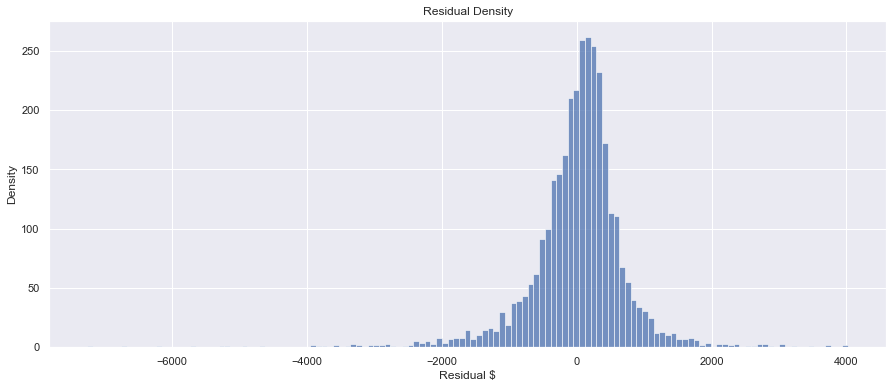

In [33]:
sns.set(rc={"figure.figsize":(15, 6)})
g = sns.histplot(y_pred-y_test)
plt.ylabel('Density')
plt.xlabel('Residual $')
plt.title('Residual Density')

# Feature Exploration

Look at the linear regression model and the feature coefficients to see if they make sense

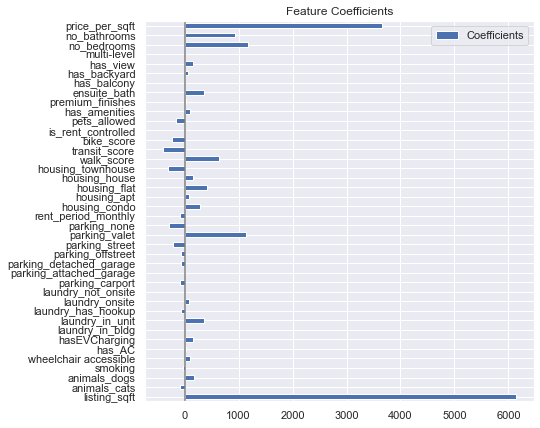

In [34]:
coefs = pd.DataFrame(
   regr.coef_,
   columns=['Coefficients'], index=X_train.columns
)

coefs.plot(kind='barh', figsize=(9, 7))
plt.title('Feature Coefficients')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

In [35]:
regr.coef_

array([ 6.14093699e+03, -8.67553628e+01,  1.76687154e+02, -3.61381268e+01,
        1.05192509e+02,  2.03124484e+01,  1.47606920e+02,  5.64420296e+00,
        3.57632705e+02, -6.56903083e+01,  8.28001023e+01,  1.24140556e+01,
       -8.08899280e+01, -1.64451061e+01, -5.96450023e+01, -6.87031333e+01,
       -2.19634250e+02,  1.14192318e+03, -2.95577579e+02, -8.30124531e+01,
        2.80282825e+02,  8.08129814e+01,  4.18220027e+02,  1.65632438e+02,
       -3.11084013e+02,  6.41501205e+02, -4.06000649e+02, -2.30596360e+02,
        5.49578576e+00, -1.61411511e+02,  1.06325645e+02,  2.35151849e+01,
        3.54046510e+02,  5.24070165e+00,  6.63047924e+01,  1.49410667e+02,
        4.02138549e+00,  1.17216067e+03,  9.40899805e+02,  3.65999047e+03])

In [36]:
X_train.head(8)

,listing_sqft,animals_cats,animals_dogs,smoking,wheelchair accessible,has_AC,hasEVCharging,laundry_in_bldg,laundry_in_unit,laundry_has_hookup,...,has_amenities,premium_finishes,ensuite_bath,has_balcony,has_backyard,has_view,multi-level,no_bedrooms,no_bathrooms,price_per_sqft
listing_id,,,,,,,,,,,,,,,,,,,,,
7537017722,0.283347,1,1,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0.833333,0.428571,0.722711
7537039769,0.309467,1,1,1,1,0,0,0,1,0,...,1,0,0,0,0,1,0,0.500000,0.428571,0.889321
7536772180,0.143198,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0.166667,0.142857,0.815318
7535447025,0.192257,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.333333,0.142857,0.319801
7534822392,0.182710,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0.166667,0.142857,0.349301
7539869801,0.289048,1,1,0,1,0,0,0,1,0,...,0,1,1,0,0,1,0,0.333333,0.428571,0.775495
7522320821,0.175020,1,0,1,1,0,1,0,1,0,...,1,1,0,0,0,0,0,0.333333,0.142857,0.461546
7536651480,0.169716,0,0,1,0,0,0,1,0,0,...,1,1,0,0,0,1,0,0.166667,0.142857,0.795721


In [37]:
y_train.head(8)

0    5199
1    6300
2    3295
3    2500
4    2499
5    5700
6    2724
7    4300
Name: listing_price, dtype: int64

In [43]:
def explain(model, X, y, listing_id):
    row = X.loc[listing_id]
    idx = X.index.get_loc(listing_id)
    y_actual = y[idx]
    y_pred = model.predict(X)[idx]
    contributions = [
        (feature, row[i] * model.coef_[i])
        for i, feature in enumerate(X.columns)
    ]
    print(f'y_actual : {y_actual}')
    print()
    print(f'y_pred : {y_pred}')
    print(f'intercept : {model.intercept_}')
    for feature, contribution in sorted(contributions, reverse=True, key=lambda c: abs(c[1])):
        if (abs(contribution)) > 0.1:
            print(f'{feature} : {contribution:.2f}')

Look at a specific listing to see the price contributions of each feature. In this case, the predicted price is lower than the actual listing price

In [44]:
explain(regr, X_test, y_test, 7501999676)

y_actual : 2225

y_pred : 3635.3440667912896
intercept : -839.3275923351516
price_per_sqft : 3254.91
listing_sqft : 879.37
walk_score : 641.50
transit_score : -406.00
bike_score : -228.29
parking_street : -219.63
no_bedrooms : 195.36
has_view : 149.41
no_bathrooms : 134.41
has_amenities : 106.33
rent_period_monthly : -83.01
housing_apt : 80.81
smoking : -36.14
laundry_in_bldg : 5.64


In [45]:
df_nonscaled.loc[7501999676]

listing_sqft                       675.000000
animals_cats                         0.000000
animals_dogs                         0.000000
smoking                              1.000000
wheelchair accessible                0.000000
has_AC                               0.000000
hasEVCharging                        0.000000
laundry_in_bldg                      1.000000
laundry_in_unit                      0.000000
laundry_has_hookup                   0.000000
laundry_onsite                       0.000000
laundry_not_onsite                   0.000000
parking_carport                      0.000000
parking_attached_garage              0.000000
parking_detached_garage              0.000000
parking_offstreet                    0.000000
parking_street                       1.000000
parking_valet                        0.000000
parking_none                         0.000000
rent_period_monthly                  1.000000
housing_condo                        0.000000
housing_apt                       